# 1 Data Collection and Cleaning


# A. Load Data


In [1]:
import pandas as pd

import pandas as pd

# Load the dataset
file_path = r"C:\Users\robel mekbib\Desktop\Capstone\effects-of-covid-19-on-trade-at-15-december-2021-provisional 1.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

  Direction  Year        Date   Weekday Country Commodity Transport_Mode  \
0   Exports  2015  01/01/2015  Thursday     All       All            All   
1   Exports  2015  02/01/2015    Friday     All       All            All   
2   Exports  2015  03/01/2015  Saturday     All       All            All   
3   Exports  2015  04/01/2015    Sunday     All       All            All   
4   Exports  2015  05/01/2015    Monday     All       All            All   

  Measure      Value  Cumulative  
0       $  104000000   104000000  
1       $   96000000   200000000  
2       $   61000000   262000000  
3       $   74000000   336000000  
4       $  105000000   442000000  


# B Data Cleaning:

In [2]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values before filling:")
print(missing_values)

# Forward fill missing values
data.ffill(inplace=True)

# Check for missing values again to confirm they are filled
missing_values_after = data.isnull().sum()
print("Missing values after filling:")
print(missing_values_after)


Missing values before filling:
Direction         0
Year              0
Date              0
Weekday           0
Country           0
Commodity         0
Transport_Mode    0
Measure           0
Value             0
Cumulative        0
dtype: int64
Missing values after filling:
Direction         0
Year              0
Date              0
Weekday           0
Country           0
Commodity         0
Transport_Mode    0
Measure           0
Value             0
Cumulative        0
dtype: int64


# Accuracy

In [30]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\robel mekbib\Desktop\Capstone\effects-of-covid-19-on-trade-at-15-december-2021-provisional 1.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:\n", missing_values)

# Check data types
data_types = data.dtypes
print("\nData types of each column:\n", data_types)

# Check unique values for key columns
unique_countries = data['Country'].unique()
unique_commodities = data['Commodity'].unique()
print("\nUnique Countries:", len(unique_countries))
print("Unique Commodities:", len(unique_commodities))

# Check for proper numerical representation
data['Value'] = data['Value'].replace({r'\$': '', r',': ''}, regex=True).astype(float) 
print("\nDescriptions of Value:\n", data['Value'].describe())

# Check for any unrealistic outlier values
outlier_threshold = data['Value'].quantile(0.99) 
outliers = data[data['Value'] > outlier_threshold]
print("\nPotential Outliers:\n", outliers)

# Check date parsing
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')
print("\nCheck dates conversion:\n", data['Date'].head())

  Direction  Year        Date   Weekday Country Commodity Transport_Mode  \
0   Exports  2015  01/01/2015  Thursday     All       All            All   
1   Exports  2015  02/01/2015    Friday     All       All            All   
2   Exports  2015  03/01/2015  Saturday     All       All            All   
3   Exports  2015  04/01/2015    Sunday     All       All            All   
4   Exports  2015  05/01/2015    Monday     All       All            All   

  Measure      Value  Cumulative  
0       $  104000000   104000000  
1       $   96000000   200000000  
2       $   61000000   262000000  
3       $   74000000   336000000  
4       $  105000000   442000000  

Missing values in each column:
 Direction         0
Year              0
Date              0
Weekday           0
Country           0
Commodity         0
Transport_Mode    0
Measure           0
Value             0
Cumulative        0
dtype: int64

Data types of each column:
 Direction         object
Year               int64
Date    

# Completeness

In [32]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\robel mekbib\Desktop\Capstone\effects-of-covid-19-on-trade-at-15-december-2021-provisional 1.csv"
data = pd.read_csv(file_path)

# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(data)) * 100

# Create a DataFrame to display the results
completeness_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
})

# Display the completeness assessment
print(completeness_df)

                Missing Values  Percentage Missing
Direction                    0                 0.0
Year                         0                 0.0
Date                         0                 0.0
Weekday                      0                 0.0
Country                      0                 0.0
Commodity                    0                 0.0
Transport_Mode               0                 0.0
Measure                      0                 0.0
Value                        0                 0.0
Cumulative                   0                 0.0


# Basic Data Validation:


In [4]:
print(data.describe())

                Year         Value    Cumulative
count  111438.000000  1.114380e+05  1.114380e+05
mean     2017.982430  2.905750e+07  5.174254e+09
std         1.992352  5.267248e+07  9.765606e+09
min      2015.000000  0.000000e+00  0.000000e+00
25%      2016.000000  1.000000e+06  1.140000e+08
50%      2018.000000  8.000000e+06  1.420000e+09
75%      2020.000000  2.800000e+07  4.797000e+09
max      2021.000000  5.490000e+08  6.718000e+10


# 2 Exploratory Data Analysis (EDA)

# A. Summary Statistics

In [5]:
# Generate summary statistics
summary_stats = data.describe()
print(summary_stats)

                Year         Value    Cumulative
count  111438.000000  1.114380e+05  1.114380e+05
mean     2017.982430  2.905750e+07  5.174254e+09
std         1.992352  5.267248e+07  9.765606e+09
min      2015.000000  0.000000e+00  0.000000e+00
25%      2016.000000  1.000000e+06  1.140000e+08
50%      2018.000000  8.000000e+06  1.420000e+09
75%      2020.000000  2.800000e+07  4.797000e+09
max      2021.000000  5.490000e+08  6.718000e+10


# B. Data Visualization

# Bar Plot for Cumulative Values by Country/Commodity

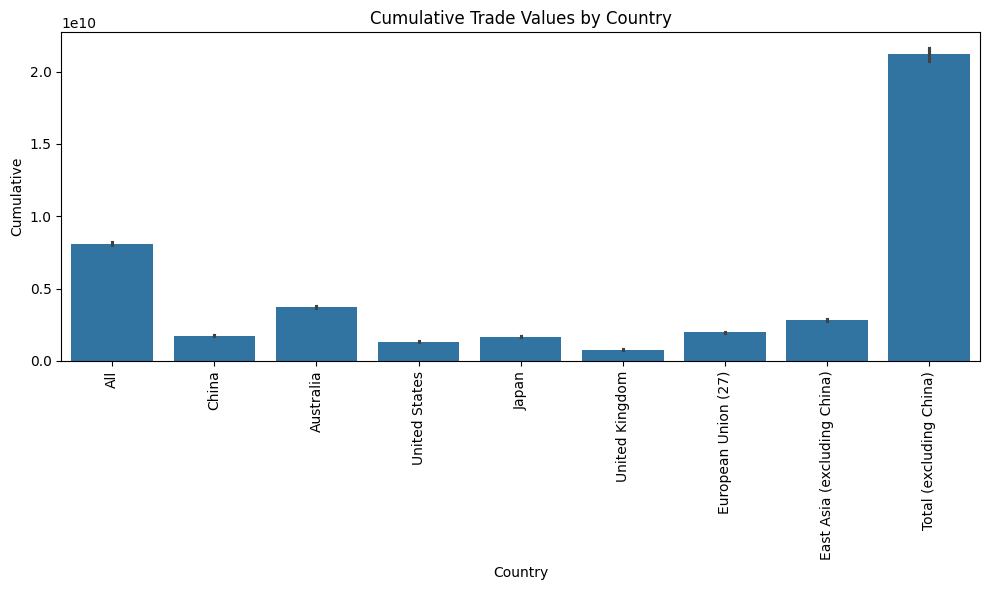

In [11]:
# Cumulative Value for each Country
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Country', y='Cumulative')
plt.title('Cumulative Trade Values by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#  Histogram plot for Distribution of Trade Values 

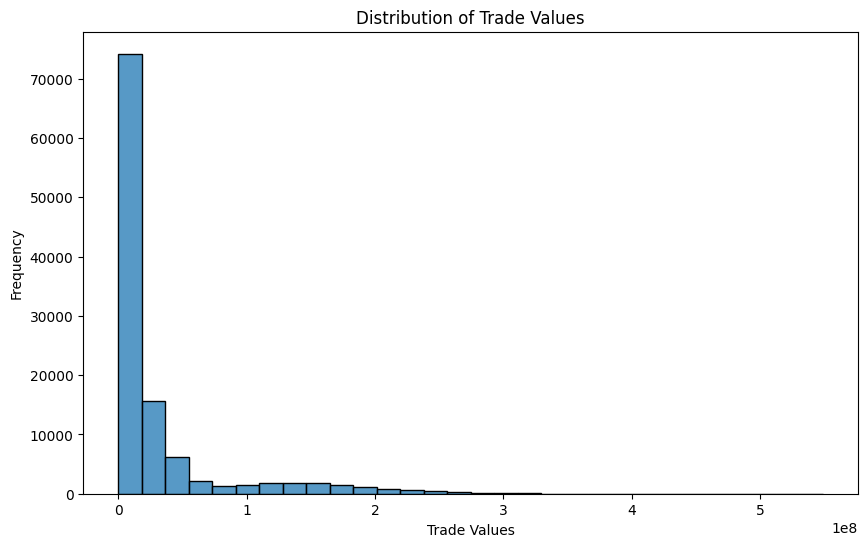

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of a numerical column
plt.figure(figsize=(10, 6))
sns.histplot(data['Value'], bins=30)
plt.title('Distribution of Trade Values')
plt.xlabel('Trade Values')
plt.ylabel('Frequency')
plt.show()


# Barplot for Top 10 Countries by Trade Value

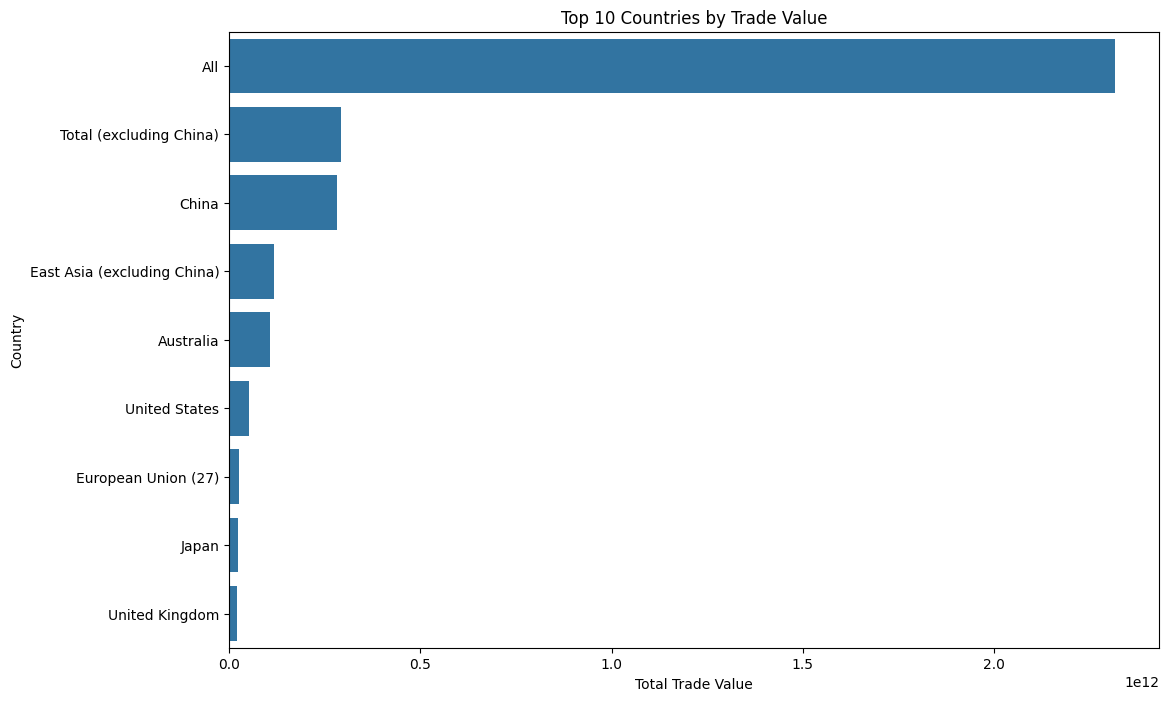

In [13]:
plt.figure(figsize=(12, 8))
country_trade = data.groupby('Country')['Value'].sum().reset_index()
sns.barplot(x='Value', y='Country', data=country_trade.sort_values('Value', ascending=False).head(10))
plt.title('Top 10 Countries by Trade Value')
plt.xlabel('Total Trade Value')
plt.ylabel('Country')
plt.show()

# Box plot for Trade Values by Country

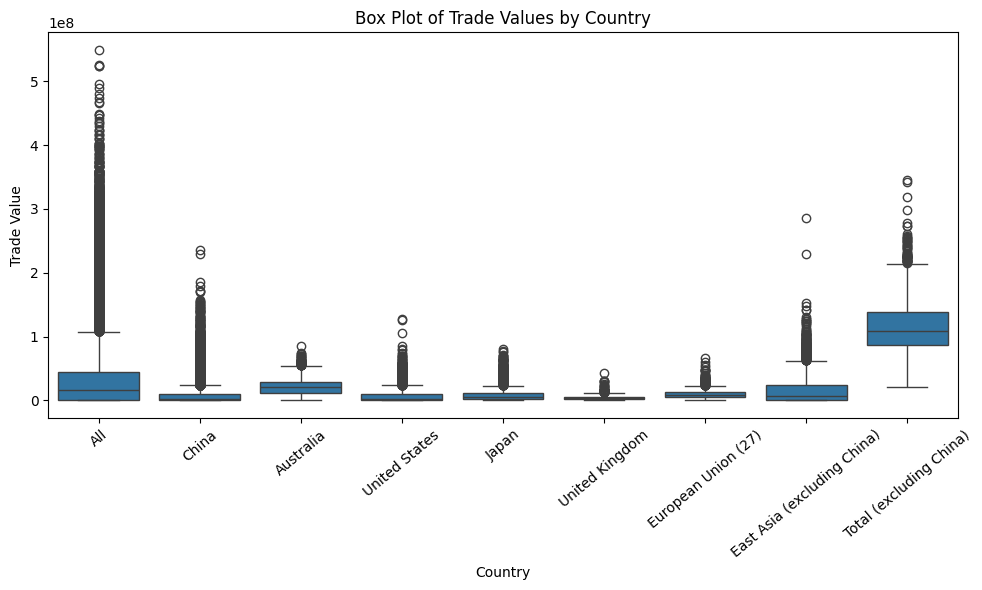

In [14]:
# Set the figure size
plt.figure(figsize=(10, 6))

# a box plot
sns.boxplot(x='Country', y='Value', data=data)

# Set title and labels
plt.title('Box Plot of Trade Values by Country')
plt.xlabel('Country')
plt.ylabel('Trade Value')

# Show the plot
plt.xticks(rotation=40)  
plt.tight_layout()
plt.show()

# 3 Modeling

# A. Forecasting

In [15]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (Example Parameters)
model = ARIMA(data['Value'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:               111438
Model:                 ARIMA(1, 1, 1)   Log Likelihood            -2070744.806
Date:                Thu, 16 Jan 2025   AIC                        4141495.611
Time:                        10:01:08   BIC                        4141524.475
Sample:                             0   HQIC                       4141504.328
                             - 111438                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2350      0.002    147.381      0.000       0.232       0.238
ma.L1         -0.9283      0.001  -1196.781      0.000      -0.930      -0.927
sigma2      9.917e+14        nan        nan        n

# B. Model Evaluation

In [36]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Forecasting
predictions = model_fit.forecast(steps=5)  
mse = mean_squared_error(data['Value'][-5:], predictions)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

RMSE: 794014.3149033732


# C. Classification

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
file_path = r"C:\Users\robel mekbib\Desktop\Capstone\effects-of-covid-19-on-trade-at-15-december-2021-provisional 1.csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns or any rows with missing target
data.drop(columns=['Date', 'Weekday', 'Cumulative', 'Measure'], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Country'] = label_encoder.fit_transform(data['Country'])
data['Commodity'] = label_encoder.fit_transform(data['Commodity'])
data['Transport_Mode'] = label_encoder.fit_transform(data['Transport_Mode'])
data['Direction'] = label_encoder.fit_transform(data['Direction'])  

# Define features and target variable
X = data.drop('Direction', axis=1)  
y = data['Direction']               

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection: Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[15237   955     0]
 [  946  4667     0]
 [    0     1   482]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     16192
           1       0.83      0.83      0.83      5613
           2       1.00      1.00      1.00       483

    accuracy                           0.91     22288
   macro avg       0.92      0.92      0.92     22288
weighted avg       0.91      0.91      0.91     22288

